In [70]:
import pandas as pd
import json
import statistics
import seaborn as sns

# 📌 Extracción

Para iniciar mi análisis, importaré los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

✅ Cargando los datos directamente desde la API utilizando Python.

✅ Normalizando las columnas con diccionarios.

✅ Convirtiendo los datos a un DataFrame de Pandas para facilitar su manipulación.

In [3]:
with open('../data/TelecomX_Data.json','r') as f:
    data = json.loads(f.read())

In [4]:
pd_data = pd.DataFrame(data)

# 🔧 Transformación

## Conociendo el conjunto de datos

Ahora que extraí los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hay en el README.md un diccionario de datos con la descripción de cada columna.

¿Qué debo hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.



In [6]:
pd_data.sample(3)

,customerID,Churn,customer,phone,internet,account
4328,5944-UGLLK,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
3599,4957-TIALW,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
5494,7529-ZDFXI,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalizando nuestros datos

Vemos que las columnas poseen diccionarios, por lo que normalizaré para separarlos en nuevas columnas, almacenandolo en un nuevo DataFrame para poder analizar y comparar los datos.

In [6]:
data_norm = pd.json_normalize(data)

In [8]:
data_norm.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3571,4919-MOAVT,Yes,Male,0,No,Yes,3,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,69.65,220.1
6382,8769-KKTPH,No,Female,0,Yes,Yes,63,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),99.65,6311.2
5227,7131-ZQZNK,No,Female,0,Yes,Yes,60,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),59.85,3590.2


Vemos los tipos de datos almacenados en las columnas

In [9]:
data_norm.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Observamos que la columna **account.Charges.Total** tiene datos de tipo *object*, entonces la convertimos a tipo *float64*.

In [9]:
data_norm['account.Charges.Total'] = pd.to_numeric(data_norm['account.Charges.Total'], errors='coerce')

In [11]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Observamos que nuestro df es de 7267 filas por 21 columnas.

In [12]:
data_norm.shape

(7267, 21)

En total tenemos 152607 datos

In [13]:
data_norm.size

152607

Vemos una lista de las columnas.

In [14]:
data_norm.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## Comprobación de incoherencias en los datos

En este paso, verifico si hay problemas en los datos que puedan afectar el análisis. Prestando atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarme de que los datos estén listos para las siguientes etapas.

In [15]:
data_norm.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


Vemos que 'Churn' tiene 3 valores posibles, cuando sólo deberían ser 2.

In [16]:
data_norm.nunique()

customerID                   7267
Churn                           3
customer.gender                 2
customer.SeniorCitizen          2
customer.Partner                2
customer.Dependents             2
customer.tenure                73
phone.PhoneService              2
phone.MultipleLines             3
internet.InternetService        4
internet.OnlineSecurity         3
internet.OnlineBackup           3
internet.DeviceProtection       3
internet.TechSupport            3
internet.StreamingTV            3
internet.StreamingMovies        3
account.Contract                3
account.PaperlessBilling        2
account.PaymentMethod           4
account.Charges.Monthly      1585
account.Charges.Total        6530
dtype: int64

Vemos los valores únicos por columna para corroborar valores

In [17]:
for columna in data_norm.columns:
    print(f'{columna} \t {data_norm[columna].unique()}')

customerID 	 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn 	 ['No' 'Yes' '']
customer.gender 	 ['Female' 'Male']
customer.SeniorCitizen 	 [0 1]
customer.Partner 	 ['Yes' 'No']
customer.Dependents 	 ['Yes' 'No']
customer.tenure 	 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService 	 ['Yes' 'No']
phone.MultipleLines 	 ['No' 'Yes' 'No phone service']
internet.InternetService 	 ['DSL' 'Fiber optic' 'No' 'Fibjsoner optic']
internet.OnlineSecurity 	 ['No' 'Yes' 'No internet service']
internet.OnlineBackup 	 ['Yes' 'No' 'No internet service']
internet.DeviceProtection 	 ['No' 'Yes' 'No internet service']
internet.TechSupport 	 ['Yes' 'No' 'No internet service']
internet.StreamingTV 	 ['Yes' 'No' 'No internet service']
internet.StreamingMovies 	 ['No' 'Yes' 'No 

⚠️ En 'Churn' no debería haber valores vacíos.

Verificamos duplicados de filas

In [18]:
sum(int(x) for x in data_norm.duplicated().values)

0

No hay filas duplicadas

Verificamos si hay un sólo registro para cada cliente

In [19]:
len(data_norm['customerID'].unique()) == len(data_norm)

True

No hay más de un registro para un cliente

Verificamos si hay valores NaN en cada columna numérica

In [20]:
for columna in ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']:
    print(columna, data_norm[columna].isna().sum())


customer.SeniorCitizen 0
customer.tenure 0
account.Charges.Monthly 0
account.Charges.Total 11


⚠️ Hay valores NaN en la columna *account.Charges.Total*

## Manejo de Inconsistencias

Aplico las correcciones necesarias. Ajusto los datos para asegurarme de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [21]:
data_norm.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6438,8849-AYPTR,No,Male,0,Yes,No,33,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,91.25,2964.05
5879,8039-EQPIM,No,Male,0,Yes,No,69,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50
5584,7632-YUTXB,No,Female,0,Yes,Yes,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,520.10


Buscamos la fila con 'Churn' == '' y las de 'account.Charges.Total' == NaN

In [22]:
data_norm[data_norm['Churn']=='']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [23]:
data_norm[data_norm['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Eliminaremos esos registros. Creamos una lista con sus índices

In [23]:
filas_a_eliminar = set(data_norm[data_norm['Churn']==''].index) | set(data_norm[data_norm['account.Charges.Total'].isna()].index)

In [25]:
filas_a_eliminar

{30,
 75,
 96,
 98,
 175,
 219,
 312,
 351,
 368,
 374,
 380,
 382,
 395,
 439,
 451,
 495,
 540,
 590,
 640,
 669,
 681,
 739,
 791,
 842,
 876,
 877,
 903,
 912,
 932,
 973,
 975,
 992,
 1013,
 1017,
 1160,
 1172,
 1218,
 1236,
 1303,
 1364,
 1366,
 1517,
 1657,
 1705,
 1764,
 1775,
 1795,
 1805,
 1825,
 1860,
 1883,
 1955,
 2021,
 2075,
 2101,
 2138,
 2151,
 2154,
 2158,
 2200,
 2232,
 2245,
 2264,
 2308,
 2390,
 2394,
 2429,
 2467,
 2494,
 2576,
 2584,
 2613,
 2627,
 2644,
 2690,
 2726,
 2733,
 2751,
 2879,
 2913,
 2919,
 2930,
 2945,
 2953,
 2973,
 2989,
 3053,
 3060,
 3076,
 3134,
 3177,
 3199,
 3202,
 3203,
 3207,
 3220,
 3249,
 3266,
 3290,
 3300,
 3305,
 3320,
 3365,
 3378,
 3438,
 3468,
 3538,
 3590,
 3617,
 3619,
 3688,
 3724,
 3804,
 3827,
 3833,
 3844,
 3858,
 3900,
 3924,
 3968,
 4021,
 4072,
 4081,
 4128,
 4169,
 4196,
 4199,
 4282,
 4327,
 4390,
 4393,
 4396,
 4411,
 4413,
 4431,
 4497,
 4541,
 4578,
 4579,
 4599,
 4609,
 4662,
 4665,
 4713,
 4750,
 4753,
 4762,
 4769,


Eliminamos las filas según los índices almacenados, y reseteamos el index

In [25]:
data_norm.drop(filas_a_eliminar, inplace=True)
data_norm.reset_index(drop=True, inplace=True)

Verifico si no quedaron registros con 'Churn' == '', y si la cantidad restante es correcta

In [27]:
( len(data_norm[data_norm['Churn']==''].index) == 0 ) & ( len(data_norm) == ( len(pd_data) - len(filas_a_eliminar) ) )

True

## Columna de cuentas diarias

Ahora que los datos están limpios, creamos la columna "Cuentas_Diarias" solicitada por el desafío, bajo el nombre "account.Charges.Daily". Usamos la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [28]:
data_norm['account.Charges.Daily'] = (data_norm['account.Charges.Monthly'] / 30).round(2)
data_norm.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46


## Estandarización y Transformación de Datos

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, podemos convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

Los nombres de las columnas decido dejarlos en inglés, me resulta más compacto a la vista, que su correspondiente al español.

Pero sí modificaré las columnas:
```
{
    'Churn': {'No': 0, 'Yes': 1},
    'customer.gender': {'Male': 0, 'Female': 1},
    'customer.Partner': {'No': 0, 'Yes': 1},
    'customer.Dependents': {'No': 0, 'Yes': 1},
    'phone.PhoneService': {'No': 0, 'Yes': 1},
    'phone.MultipleLines': {'No': 0, 'Yes': 1, 'No phone service': 2},
    'internet.InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2, 'Fibjsoner optic': 3},
    'internet.OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.TechSupport': : {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'account.Contract': {'One year': 12, 'Month-to-month': 1, 'Two year': 24},
    'account.PaperlessBilling':	{'No': 0, 'Yes': 1},
    'account.PaymentMethod': {'Mailed check': 0, 'Electronic check': 1, 'Credit card (automatic)': 2, 'Bank transfer (automatic)': 3}
}
```


In [28]:
diccionario_reemplazo_multiple = {
    'Churn': {'No': 0, 'Yes': 1},
    'customer.gender': {'Male': 0, 'Female': 1},
    'customer.Partner': {'No': 0, 'Yes': 1},
    'customer.Dependents': {'No': 0, 'Yes': 1},
    'phone.PhoneService': {'No': 0, 'Yes': 1},
    'phone.MultipleLines': {'No': 0, 'Yes': 1, 'No phone service': 2},
    'internet.InternetService': {'No': 0, 'DSL': 1, 'Fiber optic': 2, 'Fibjsoner optic': 3},
    'internet.OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'internet.StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'account.Contract': {'One year': 12, 'Month-to-month': 1, 'Two year': 24},
    'account.PaperlessBilling':	{'No': 0, 'Yes': 1},
    'account.PaymentMethod': {'Mailed check': 0, 'Electronic check': 1, 'Credit card (automatic)': 2, 'Bank transfer (automatic)': 3}
}


In [30]:
data_norm = data_norm.replace(diccionario_reemplazo_multiple);
data_norm.sample(3)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8212\4053268346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_norm = data_norm.replace(diccionario_reemplazo_multiple);


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
2832,4039-PIMHX,0,0,1,1,0,49,1,0,1,...,0,0,0,0,24,0,0,49.80,2398.40,1.66
2881,4115-UMJFQ,0,0,0,0,0,69,0,2,1,...,1,0,0,0,12,1,3,35.75,2492.25,1.19
1506,2211-RMNHO,0,1,0,1,1,68,1,1,1,...,1,1,1,1,24,0,3,85.30,5560.00,2.84


#📊 Carga y análisis

## Análisis Descriptivo

Para comenzar, realizamos un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [31]:
data_norm.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,1.224261,0.718857,...,0.776166,0.722412,0.816695,0.820677,8.813851,0.592719,1.426763,64.798208,2283.300441,2.159891
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,0.778876,0.796556,...,0.778542,0.795571,0.762952,0.761287,9.541690,0.491363,1.067504,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,2.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,24.000000,1.000000,3.000000,118.750000,8684.800000,3.960000


Iniciaremos evaluando:
* *customer.tenure*: Tiempo que el cliente ha estado en la empresa. Es una variable continua y muy relevante para entender lealtad o permanencia.

* *account.Charges.Monthly*: Monto mensual que paga el cliente. Es clave para ver si los clientes que pagan más tienden a irse o quedarse.

* *account.Charges.Total*: Total acumulado pagado por el cliente. Da una idea del valor del cliente para la empresa.

* *account.Charges.Daily*: Probablemente una derivada del total dividido por los días de permanencia. También puede ser útil para comparar con otras métricas de consumo.

In [31]:
data[1]

{'customerID': '0003-MKNFE',
 'Churn': 'No',
 'customer': {'gender': 'Male',
  'SeniorCitizen': 0,
  'Partner': 'No',
  'Dependents': 'No',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'No',
  'TechSupport': 'No',
  'StreamingTV': 'No',
  'StreamingMovies': 'Yes'},
 'account': {'Contract': 'Month-to-month',
  'PaperlessBilling': 'No',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 59.9, 'Total': '542.4'}}}

In [32]:
data_norm[data_norm['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily


In [33]:
def analisis_Descriptivo(columna):
    print(f'El promedio de {columna} es de {data_norm[columna].mean()}')
    print(f'La mediana de {columna} es de {data_norm[columna].median()}')
    print(f'La desviación estándar de {columna} es de {statistics.pstdev(data_norm[columna])}')


In [41]:
analisis_Descriptivo('customer.tenure')
analisis_Descriptivo('account.Charges.Monthly')
analisis_Descriptivo('account.Charges.Total')
analisis_Descriptivo('account.Charges.Daily')

El promedio de customer.tenure es de 32.421786120591584
La mediana de customer.tenure es de 29.0
La desviación estándar de customer.tenure es de 24.543514392682013
El promedio de account.Charges.Monthly es de 64.79820819112628
La mediana de account.Charges.Monthly es de 70.35
La desviación estándar de account.Charges.Monthly es de 30.083834589143024
El promedio de account.Charges.Total es de 2283.3004408418656
La mediana de account.Charges.Total es de 1397.475
La desviación estándar de account.Charges.Total es de 2266.6101807145346
El promedio de account.Charges.Daily es de 2.1598905005688285
La mediana de account.Charges.Daily es de 2.34
La desviación estándar de account.Charges.Daily es de 1.00288392565063


## Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utilizaré un gráfico de barras para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [35]:
import matplotlib.pyplot as plt

In [42]:
data_norm.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,...,0,1,1,0,12,1,0,65.6,593.3,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,1,...,0,0,0,1,1,0,0,59.9,542.4,2.00


## Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
data_norm.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,...,0,1,1,0,12,1,0,65.6,593.3,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,1,...,0,0,0,1,1,0,0,59.9,542.4,2.00


In [61]:
def comp_churn(df, column, title, xtitle, barNorm = None):
    fig = px.histogram(df, 
                    x = column, 
                    text_auto = True, 
                    color = 'Churn', 
                    barmode='relative', 
                    barnorm = barNorm,
                    title = title,
                    color_discrete_sequence=['green', 'red']
                    )
    fig.update_layout(
        title_x=0.5, # Centrar el título
        xaxis_title= xtitle,
        yaxis_title="Churn rate",
        bargap=0.2
    )
    fig.show()

In [62]:
comp_churn(data_norm, 'customer.gender', 'Churn Rate by Gender', 'Gender')

In [63]:
comp_churn(data_norm, 'customer.SeniorCitizen', 'Churn Rate by Senior Citizen', 'Senior Citizen')

In [65]:
comp_churn(data_norm, 'costumer.tenure', "Churn Rate by Customer Tenure", 'Tenure')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'account.Charges.Daily'] but received: costumer.tenure

In [53]:
data_norm.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,Active,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,Active,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00


In [131]:
df_t.columns

Index([0, 1], dtype='int64', name='Churn')

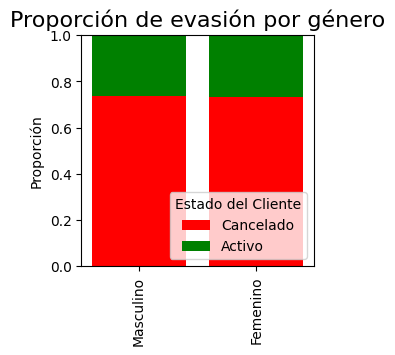

In [122]:
comparar_evasion(data_norm, 'customer.gender', ['Masculino', 'Femenino'], 'género')


In [130]:
comparar_evasion(data_norm, 'customer.tenure',df_t.index(), 'personas mayores')

TypeError: 'MultiIndex' object is not callable

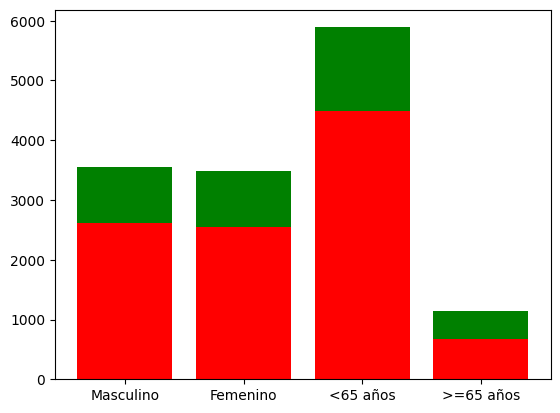

In [ ]:
df = data_norm.groupby(['customer.gender', 'Churn']).size().unstack(fill_value=0)

# create data
x = ['Masculino', 'Femenino']
y1 = df[0]
y2 = df[1]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='g')

df = data_norm.groupby(['customer.SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# create data
x = ['<65 años', '>=65 años']
y1 = df[0]
y2 = df[1]

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='g')

plt.show()

#📄Informe final